In [6]:
from astropy.modeling import models, Fittable1DModel, Parameter
from astropy.modeling import fitting
import astropy.units as u
import astropy.constants as const

from spectacle.core.spectrum import Spectrum1D
from spectacle.modeling.custom import Masker
from spectacle.io.registries import line_registry

import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [8, 16]
# plt.rcParams["figure.dpi"] = 80

# Masking

In [8]:
from astropy.modeling.fitting import LevMarLSQFitter
import astropy.units as u

Define both the wavelength and velocity dispersion arrays. These can be swapped out at will, and the package should automatically adjust as long as they are `Quantity` objects.

In [9]:
wavelength = np.linspace(1210, 1250, 1001) * u.Angstrom
velocity = np.linspace(-800, 800, 1000) * u.Unit("km/s")

Intentionally use the wrong line name to test the word-guessing algorithm.

In [10]:
line = line_registry.with_name('HI1215')
print(line)

INFO:root:Found line with name 'HI1216' from given name 'HI1215'.


 name     wave   osc_str    gamma   
        Angstrom                    
------ --------- ------- -----------
HI1216 1215.6701  0.4164 626500000.0


Create a spectrum object. Note that the the `add_line` method uses the `line_registry`
to find the line information, hence we don't actually *need* to get the line directly
from the registry as we did a couple of lines up.

In [11]:
spectrum = Spectrum1D(center=line['wave'], redshift=2)
spectrum.add_line(name="HI1216", 
                  v_doppler=1e6 * u.Unit('cm/s'),
                  column_density=1e15 * u.Unit('1/cm2'))

This is the raw spectrum data given the velocity as the dispersion.

In [12]:
y = spectrum.optical_depth(velocity)

We can mask only the interesting parts by passing the dispersion and data arrays
through the `Masker` model.

In [13]:
x, my = Masker()(velocity, y)

UnitsError: Units of input 'x', km / s (speed), could not be converted to required input units of Angstrom (length)

In [ ]:
f, ax = plt.subplots()

# ax.plot(velocity, y)
ax.plot(x, my)

## Control Spectrum

This spectrum acts as the standard to which the dynamic spectrum will be compared in the correlation metrics.

In [ ]:
import astropy.units as u

wavelength = np.linspace(1210, 1250, 1001) * u.Angstrom
velocity = np.linspace(-800, 800, 1000) * u.Unit("km/s")

In [ ]:
from astropy.modeling.fitting import LevMarLSQFitter

line = line_registry.with_name('HI1215')

spectrum = Spectrum1D(center=line['wave']).add_line("HI1216", v_doppler=1e7 * u.Unit('cm/s'))

fitter = LevMarLSQFitter()
new_voigt = fitter(spectrum.tau, velocity, spectrum.tau(velocity))

print(new_voigt)

f, ax = plt.subplots()

ax.plot(velocity, spectrum.tau(velocity))
ax.plot(velocity, new_voigt(velocity))

In [ ]:
from astropy.modeling.models import Voigt1D
from astropy.modeling.fitting import LevMarLSQFitter

line = line_registry.with_name('HI1215')

spectrum = Spectrum1D(center=line['wave']).add_line("HI1216", v_doppler=1e7 * u.Unit('cm/s'))

voigt = Voigt1D(x_0=0.0001, amplitude_L=0.17, fwhm_G=40, fwhm_L=8)

fitter = LevMarLSQFitter()
new_voigt = fitter(spectrum.tau, velocity, spectrum.tau(velocity))

f, ax = plt.subplots()

ax.plot(velocity, spectrum.tau(velocity))
ax.scatter(velocity, voigt(velocity.value))
ax.plot(velocity, new_voigt(velocity))

# fwhm = line.fwhm(velocity, velocity=True)
# print(fwhm)

# ax.axvline(line['lambda_0']-fwhm*0.5)
# ax.axvline(line['lambda_0']+fwhm*0.5)

# ax.axvline(line['lambda_0']-fwhm)
# ax.axvline(line['lambda_0']+fwhm)

# mask = spectrum.line_mask(velocity)
# ax.scatter(velocity[mask], spectrum.tau.velocity_space(velocity, center=line['lambda_0'])[mask])

# for line in spectrum._line_model:
#     print(line.dv90(wavelength))

In [ ]:
# ax.axvline(vmn.value)
# ax.axvline(vmx.value)

In [ ]:
# fwhm = spectrum._line_model.fwhm().value
# ax.axvline(-fwhm*0.5, color='r')
# ax.axvline(fwhm*0.5, color='r')

In [ ]:
from spectacle.core.line_finder import LineFinder

tau_spec = spectrum.set_redshift(fixed={'z': True}).tau
print(tau_spec.fixed)

# nspec = Spectrum1D()
# nspec = nspec.from_data(wavelength, spectrum.tau(wavelength), smooth=False)
nspec = LineFinder(tau_spec)#line_list=["HI1216"])
# print(nspec)

# print(nspec(velocity, tau_spec(velocity)))
# print(nspec)
fitter = LevMarLSQFitter()
fit_nspec = fitter(nspec, velocity, tau_spec)

for pn in fit_nspec.result_model.param_names:
    print(getattr(fit_nspec.result_model, pn))

# print(fit_nspec)

# f, ax = plt.subplots()

# # ax.plot(wavelength, spectrum.flux(wavelength))
# ax.plot(wavelength, nspec(wavelength))

In [ ]:
f, ax = plt.subplots()

ax.plot(velocity, spectrum.tau(velocity))
ax.plot(velocity, fit_nspec.result_model(velocity))

In [1]:
from astropy.modeling import models, Fittable1DModel, Parameter
from astropy.modeling import fitting
import astropy.units as u
import astropy.constants as const

from spectacle.core.spectrum import Spectrum1D
from spectacle.modeling.custom import Masker
from spectacle.io.registries import line_registry

import numpy as np
import matplotlib.pyplot as plt
from spectacle.modeling.fitters import MCMCFitter
import numpy as np

velocity = np.linspace(-800, 800, 1000) * u.Unit("km/s")

line = line_registry.with_name('HI1215')

spectrum = Spectrum1D(center=line['wave']).add_line(name="HI1216", 
                                                    v_doppler=1.5e6 * u.Unit('cm/s'),
                                                    column_density=1e15 * u.Unit('1/cm2'))

y = spectrum.optical_depth(velocity) + np.random.sample(size=velocity.size) * 0.15 - 0.075

# fitter = MCMCFitter()
# fitter(spectrum.optical_depth, velocity.data, y)

INFO:root:Found line with name 'HI1216' from given name 'HI1215'.


In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


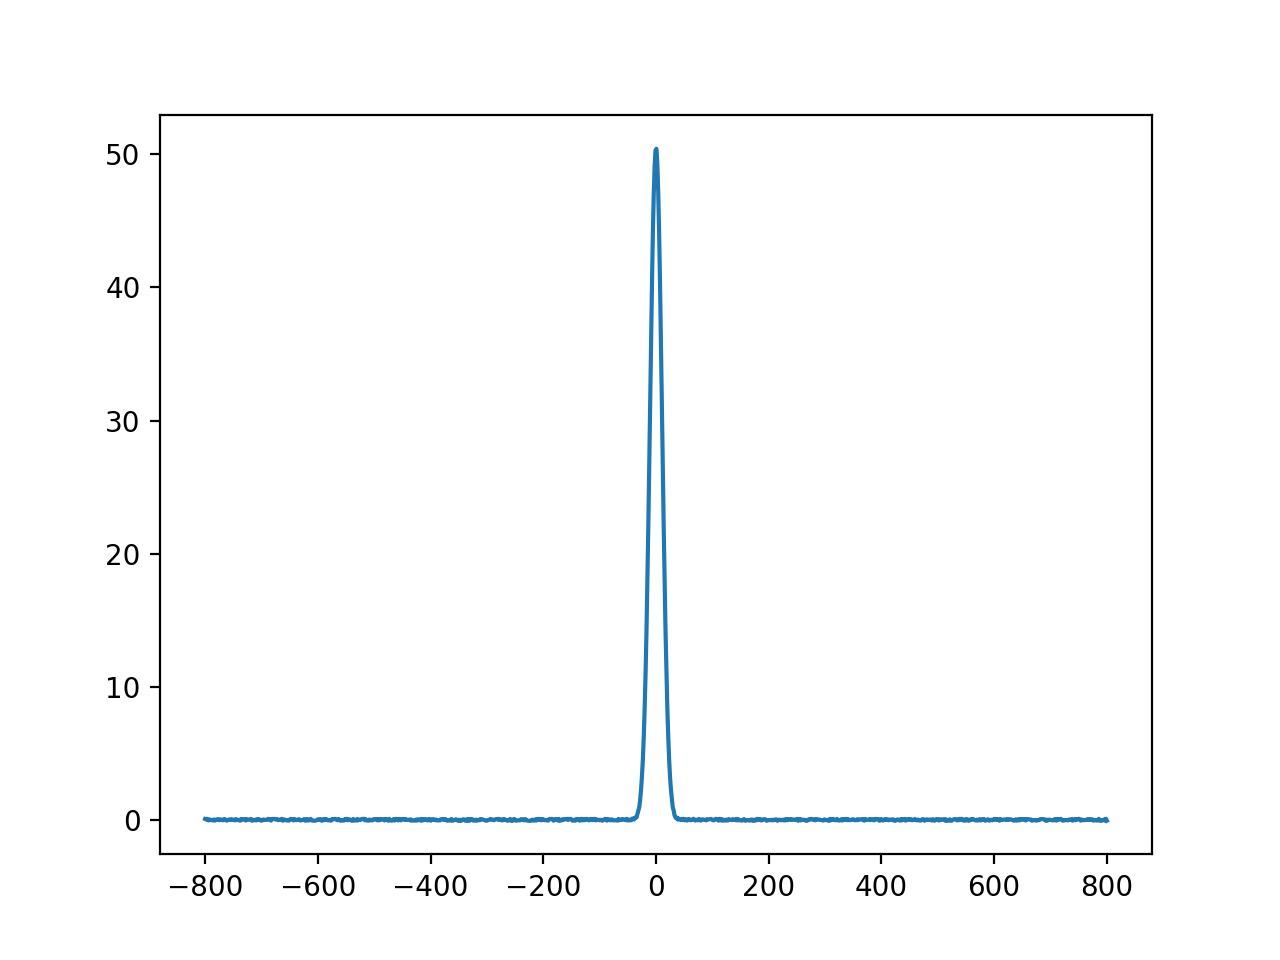

In [3]:
from spectacle.analysis.line_finder import LineFinder

# line_finder = LineFinder()
# line_finder(velocity, y)

# print(line_finder.result_model)

f, ax = plt.subplots()

ax.plot(velocity, y)
# ax.plot(velocity, line_finder.result_model(velocity))

<IPython.core.display.Javascript object>


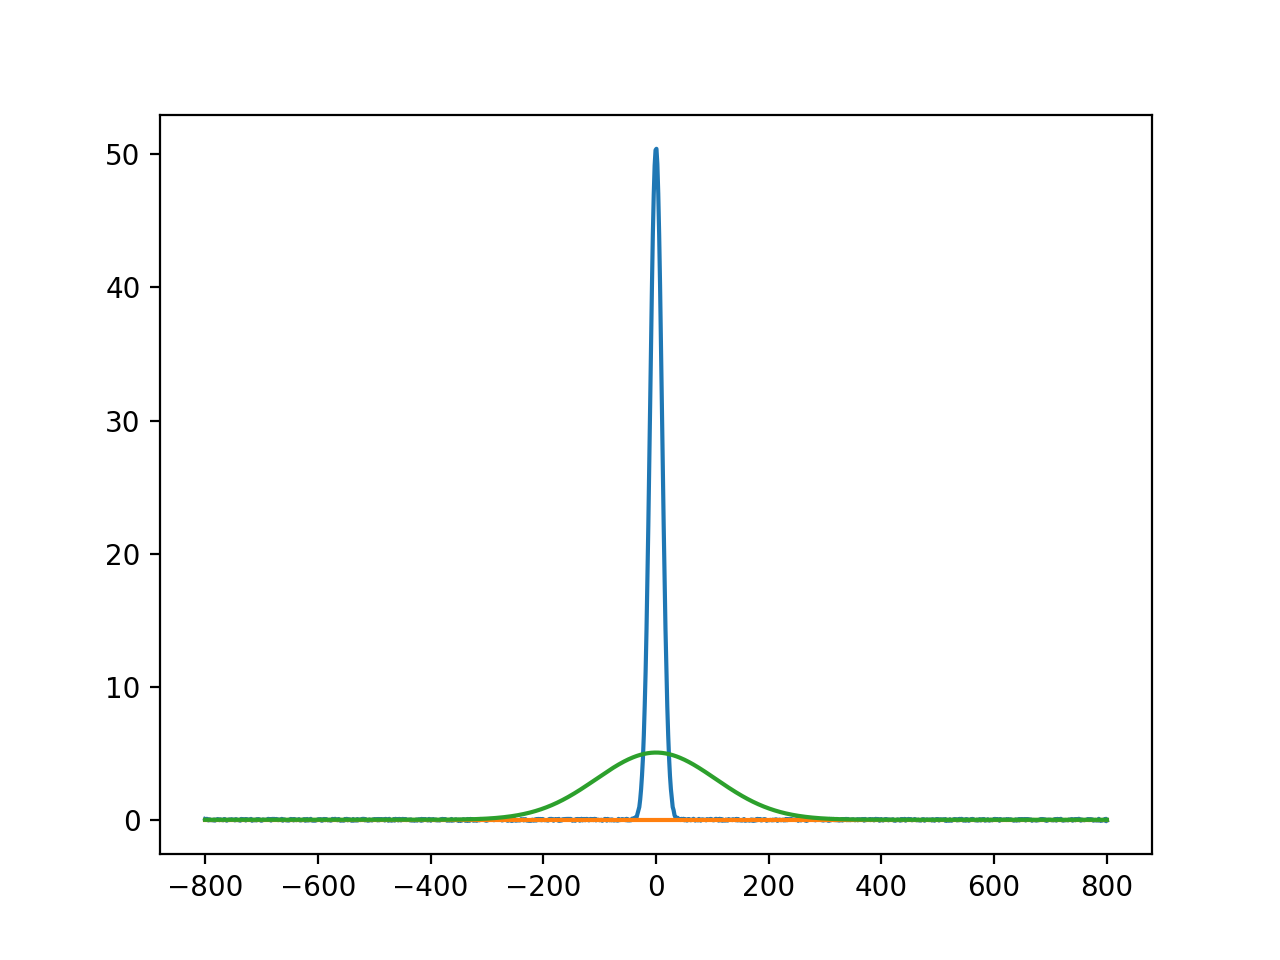

In [4]:
spectrum2 = Spectrum1D(center=line['wave']).add_line(name="HI1216", 
                                                     v_doppler=1.5e7 * u.Unit('cm/s'),
                                                     column_density=1e15 * u.Unit('1/cm2'),
                                                     fixed={'column_density': False,
                                                            'delta_lambda': False})

from astropy.modeling.fitting import LevMarLSQFitter

fitter = LevMarLSQFitter()
res_fit = fitter(spectrum2.optical_depth, velocity, y)

# print(list(zip(res_fit.param_names, res_fit.parameters)))
# print(res_fit.fixed)
# print(res_fit)

f, ax = plt.subplots()

ax.plot(velocity, y)
ax.plot(velocity, res_fit(velocity))
ax.plot(velocity, spectrum2.optical_depth(velocity))

In [ ]:
import astropy
print(astropy.__version__)